# Project 2 - Supervised Learning: Regression
This notebook is a part of my second project required by the IBM Machine Learning Professional Certificate.

Data Source: Ford dataset from [100,000 UK Used Car Data set](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

The main objective of this analysis is to predict price(£) of used Ford cars using Linear Regressions.

Notebook Contents:

>1. Train test split<br>

>2. Simple EDA<br>
Descriptive statistics and data cleaning<br>
Numerical features<br>
Categorical features

>3. Model variations<br>
Apply One-hot encoding<br>
Apply Square root transformation<br>
Apply Standard scaling<br>
Add Polynomial features

>4. Cross-validation and Regularization<br>
Linear Regression<br>
Lasso Regression (L1)<br>
Ridge Regression (L2)<br>
Elastic Net Regression (L1 + L2)<br>
Compare the metrics

>5. Predict on the test set<br>
Scatter plots of four models<br>
Feature importance

>6. Conclusion

## 1. Train test split

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_49695b9fc9424a8fa0cbf5cfb0b0891e = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_49695b9fc9424a8fa0cbf5cfb0b0891e = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_49695b9fc9424a8fa0cbf5cfb0b0891e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_8TiHWSeeyf6ya-kPOQ-tRzm1gQUx-CtT5h1F1vXng90',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_49695b9fc9424a8fa0cbf5cfb0b0891e)

body = client_49695b9fc9424a8fa0cbf5cfb0b0891e.get_object(Bucket='ibmmachinelearningprofessionalcer-donotdelete-pr-mhask4ar6w7kts',Key='ford.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
# Print out the data shape
data.shape

(17965, 9)

In [5]:
# Drop duplicates and check the new data shape
data = data.drop_duplicates(keep='first').reset_index(drop=True)
data.shape

(17811, 9)

In [6]:
# Split the data to use the training set only
# Keep the test set unseen
from sklearn.model_selection import train_test_split
train_and_val, test = train_test_split(data, test_size=0.2, random_state=0)
print(f'Training and validation set size: {train_and_val.shape}')
print(f'Test set size: {test.shape}')

Training and validation set size: (14248, 9)
Test set size: (3563, 9)


In [7]:
train, val = train_test_split(train_and_val, test_size=0.25, random_state=0)
print(f'Training set size: {train.shape}')
print(f'Validation set size: {val.shape}')

Training set size: (10686, 9)
Validation set size: (3562, 9)


## 2. Simple EDA
### Descriptive statistics and data cleaning

In [8]:
# Print out first 5 rows
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14875,Kuga,2016,12000,Manual,21569,Diesel,125,60.1,2.0
10148,B-MAX,2016,9995,Semi-Auto,17900,Petrol,160,44.1,1.6
10329,Fiesta,2017,9280,Manual,28000,Petrol,145,62.8,1.0
5949,Fiesta,2019,16295,Semi-Auto,7698,Petrol,145,48.7,1.0
11779,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0


In [9]:
# Training set info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 14875 to 2308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10686 non-null  object 
 1   year          10686 non-null  int64  
 2   price         10686 non-null  int64  
 3   transmission  10686 non-null  object 
 4   mileage       10686 non-null  int64  
 5   fuelType      10686 non-null  object 
 6   tax           10686 non-null  int64  
 7   mpg           10686 non-null  float64
 8   engineSize    10686 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 834.8+ KB


In [10]:
# Basic statistics
train.describe()

,year,price,mileage,tax,mpg,engineSize
count,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000
mean,2016.870017,12274.090118,23344.321168,113.443758,57.850926,1.353977
std,2.056717,4771.685341,19499.540207,61.416648,10.169595,0.434362
min,1996.000000,675.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9975.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18229.500000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000
max,2060.000000,49999.000000,174000.000000,580.000000,201.800000,5.000000


In [11]:
# Add in new feature age, and remove year
# The data were collected in 2020, so the age column is calculated from this year
train = train[train['year'] <= 2020]
train['age'] = 2020 - train['year']
train = train.drop(['year'], axis=1)

In [12]:
# Determine columns by data types
cat_mask = (train.dtypes == np.object)
num_mask = (train.dtypes == np.float64) | (train.dtypes == np.int64)

cat_cols = train.columns[cat_mask].tolist()
num_cols = train.columns[num_mask].tolist()

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['model', 'transmission', 'fuelType']
Numerical columns: ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']


### Numerical features

In [13]:
# Create a plotting function
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):

    """ Returns multiple histograms as subplots
    """
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution')
            ax.tick_params(axis='x')
            ax.tick_params(axis='y')
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

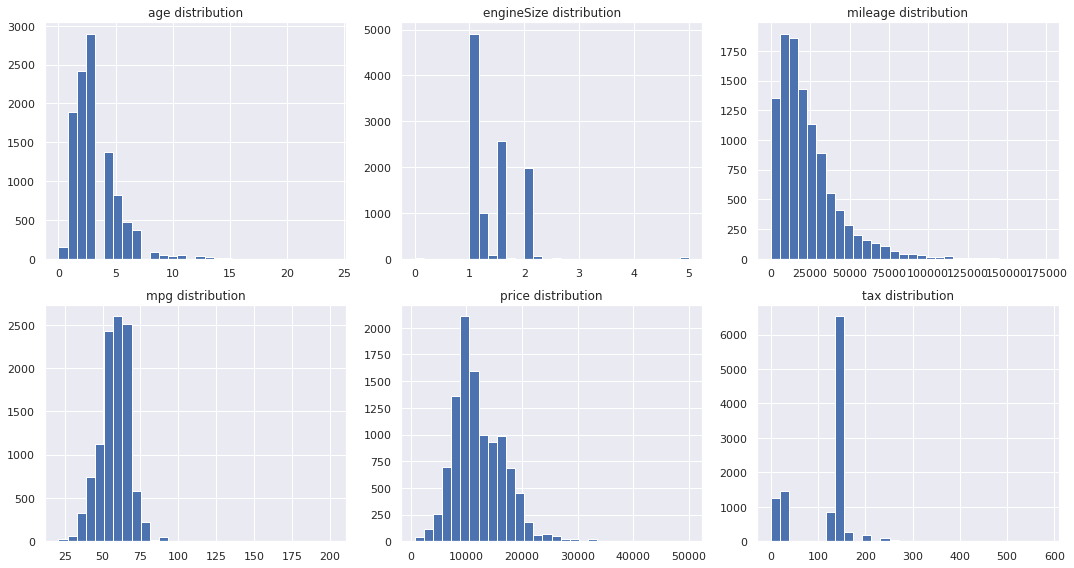

In [14]:
# Plot all numerical features
hist_loop(data=train[num_cols],
          rows=2,
          cols=3,
          figsize=(15,8))

Now, let's check the skewness of all numerical features.

In [15]:
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    # Define a limit above which we will transform
    skew_vals = data.skew()

    # Showing the skewed columns
    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(skew_limit))
    )
    return skew_cols
skew_cols = skew_df(train[num_cols], 0.75)
skew_cols

,Skew
engineSize,1.990589
mileage,1.842012
age,1.839659
price,1.162327


Except for tax and mpg, all features are right-skewed, and also there are zero values in engineSize (electric cars). Square root transformation might be a good choice to eliminate the skewness in this case.

In [16]:
# Apply square root transformation on predictors only
train_sqrt = train[num_cols].drop('price', axis=1).copy()
for col in list(skew_cols.index):
    if col != 'price':
        train_sqrt[col] = train_sqrt[col].apply(np.sqrt)

# Check again
skew_df(train_sqrt, 0.75)

,Skew


Skewness is fixed. Let's use a pairplot to have an overview of these features and the target.

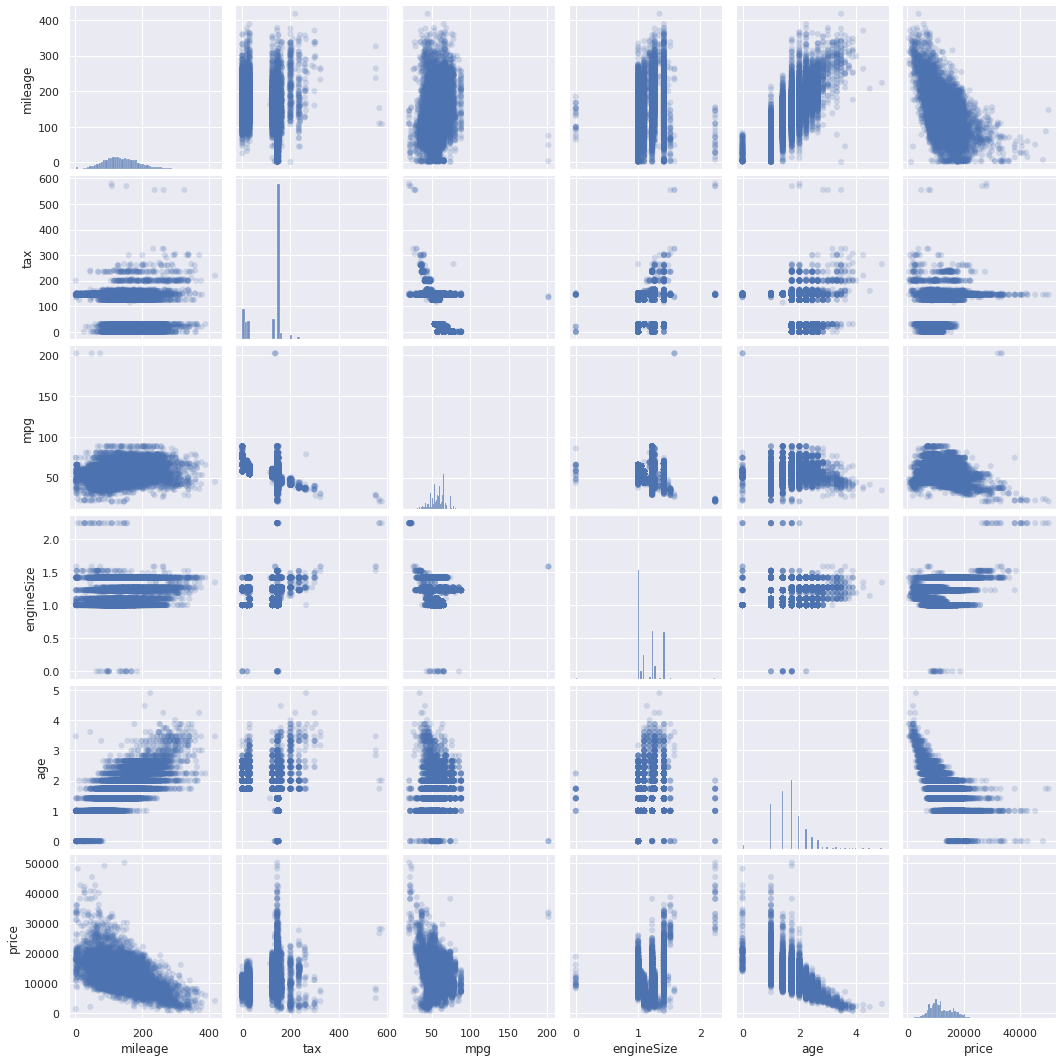

In [17]:
# Pairplot of transformed features and the target
sns.pairplot(train_sqrt.join(train['price']), plot_kws=dict(alpha=.2, edgecolor='none'));

This plot shows that:
- age has a linear relationship with price. It looks quite like polynomial. 
- age also has a linear relationship with mileage (the older the more miles). This is multicollinearity.

Let's see how severe the multicollinearity is.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(train_sqrt)

,variables,VIF
0,mileage,14.761496
1,tax,5.166526
2,mpg,17.231184
3,engineSize,30.651363
4,age,22.473605


The features have high multicollinearity. This problem might be resolved by regularization later.

### Categorical features
In this part, I will check the data integrity and also plot some boxplots to see how price is different among these categories. But I will not perform much analysing to find combined relationship or correlation.

These plots are based on price values before transformation.

In [20]:
train.describe(include=np.object)

,model,transmission,fuelType
count,10685,10685,10685
unique,22,3,5
top,Fiesta,Manual,Petrol
freq,3890,9240,7267


In [21]:
# Print out all unique model names
list(train['model'].unique())

[' Kuga',
 ' B-MAX',
 ' Fiesta',
 ' Mustang',
 ' EcoSport',
 ' Focus',
 ' C-MAX',
 ' S-MAX',
 ' Mondeo',
 ' Galaxy',
 ' Ka+',
 ' KA',
 ' Edge',
 ' Puma',
 ' Transit Tourneo',
 ' Grand C-MAX',
 ' Grand Tourneo Connect',
 ' Tourneo Custom',
 ' Tourneo Connect',
 ' Fusion',
 ' Streetka',
 ' Escort']

There is a leading space in each model name. This is not necessary but let's just remove them.

In [22]:
# Remove leading spaces
train['model'] = train['model'].str.strip(' ')

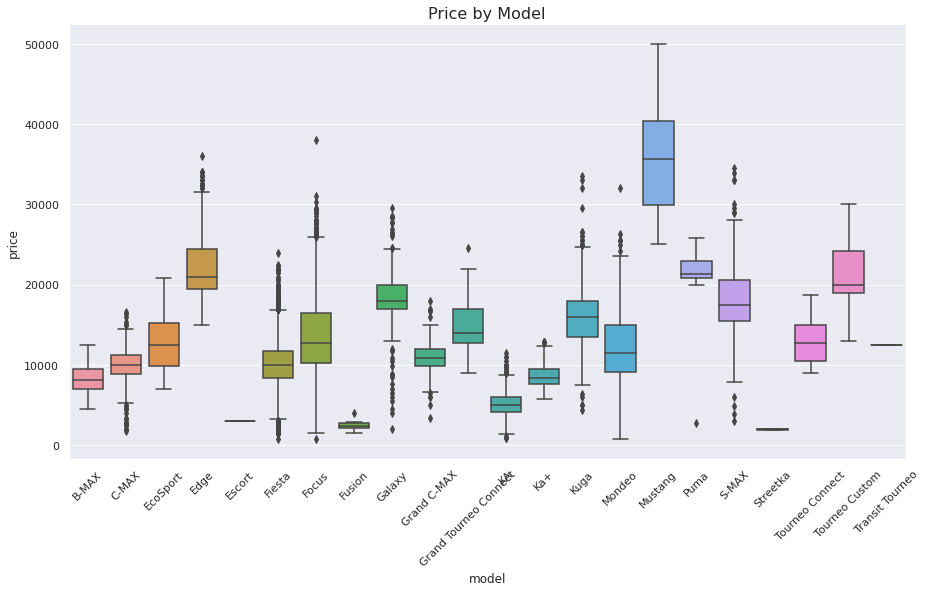

In [23]:
# Boxplot of model and price
fig, ax = plt.subplots(figsize=(15,8))
order = sorted(list(train['model'].unique()))
sns.boxplot(x='model', y='price', data=train, order=order, ax=ax)
plt.xticks(rotation=45)
plt.title('Price by Model', fontsize=16)
plt.show()

In [24]:
list(train['transmission'].unique())

['Manual', 'Semi-Auto', 'Automatic']

In [25]:
list(train['fuelType'].unique())

['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric']

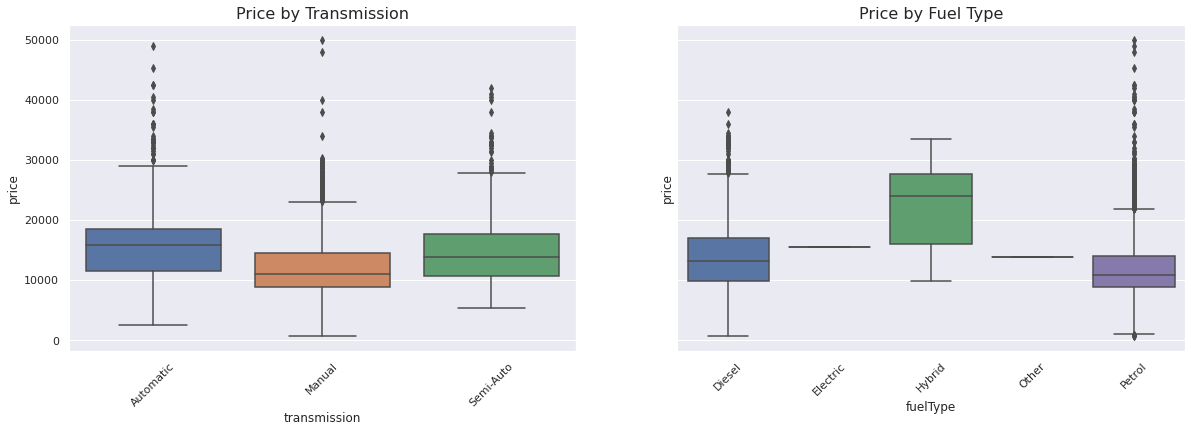

In [26]:
# Box plots of price and tranmission/ fuel type
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
order0 = sorted(list(train['transmission'].unique()))
sns.boxplot(x='transmission', y='price', data=train, order=order0, ax=ax[0])
ax[0].set_title('Price by Transmission', fontsize=16)
ax[0].tick_params('x', labelrotation=45)

order1 = sorted(list(train['fuelType'].unique()))
sns.boxplot(x='fuelType', y='price', data=train, order=order1, ax=ax[1])
ax[1].set_title('Price by Fuel Type', fontsize=16)
ax[1].tick_params('x', labelrotation=45)
plt.show()

On average, car prices are different among models, transmission, and fuel types.

## 3. Model variations
In this part, I will perform different feature engineering in an order, then fit the linear regression after each engineering step. The root mean square errors are stored and compared.

In [27]:
# Copy the data from training and validation set
# Clean the data
df = train_and_val.copy()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [29]:
# Create a class for feature engineering and model fitting
class LR_model:

    # Default values
    target = 'price'
    test_size = 0.25
    random_state = 0
    skew_cols = ['engineSize', 'mileage', 'age']

    def __init__(self, data):
        self.train, self.test = train_test_split(data, test_size=LR_model.test_size, random_state=LR_model.random_state)
    
    def clean_data(self, df):

        """ Cleans the data"""

        df = df[df['year'] <= 2020]
        df['age'] = 2020 - df['year']
        df = df.drop(['year'], axis=1)
        df['model'] = df['model'].str.strip(' ')
        
        return df
        
    def oh_enc(self, X_train, X_test):

        """ Performs one-hot encoding and drops the first category
        """

        ENC = OneHotEncoder(handle_unknown='ignore', sparse=False)

        # Filter categorical features only
        X_train_cat = X_train.select_dtypes(include=['object'])
        X_test_cat = X_test.select_dtypes(include=['object'])

        # Fit one-hot encoding on training set
        # Transform both training set and test set
        X_train_enc = ENC.fit_transform(X_train_cat)
        X_test_enc = ENC.transform(X_test_cat)

        # Join dummy values with numerical features
        X_train_enc_df = pd.DataFrame(X_train_enc,
                                      index=X_train.index,
                                      columns=ENC.get_feature_names(X_train_cat.columns.tolist()))
        X_train = X_train_enc_df.join(X_train.select_dtypes(exclude=['object']))

        # Drop one column of each category
        for col in X_train_cat.columns.tolist():
            cat_cols = X_train.columns[X_train.columns.str.startswith(col)].tolist()
            if len(cat_cols) > 1:
                X_train = X_train.drop(cat_cols[0], axis=1)
        
        # Same steps for the test set
        X_test_enc_df = pd.DataFrame(X_test_enc,
                                     index=X_test.index,
                                     columns=ENC.get_feature_names(X_test_cat.columns.tolist()))
        X_test = X_test_enc_df.join(X_test.select_dtypes(exclude=['object']))
        for col in X_test_cat.columns.tolist():
            cat_cols = X_test.columns[X_test.columns.str.startswith(col)].tolist()
            if len(cat_cols) > 1:
                X_test = X_test.drop(cat_cols[0], axis=1)

        return X_train, X_test

    def sqrt_trans(self, X_train, X_test):

        """ Applies square root transformation for skewed features
        """
        X_train[LR_model.skew_cols] = X_train[LR_model.skew_cols].apply(np.sqrt)
        X_test[LR_model.skew_cols] = X_test[LR_model.skew_cols].apply(np.sqrt)

        return X_train, X_test

    def scale_X(self, X_train, X_test):

        """ Applies standard scaling for all numerical features
        """

        scaler = StandardScaler()

        # Filter numerical features only (excluding binary values)
        float_cols = X_train.columns[~X_train.isin([0,1]).all()].tolist()

        # Fit features in traning set and transform to test set
        X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
        X_test[float_cols] = scaler.transform(X_test[float_cols])

        return X_train, X_test

    def add_pf(self, X_train, X_test, degree=None):

        """ Adds polynomial features into the dataset
        """
        
        PF = PolynomialFeatures(degree=degree, include_bias=False)

        # Filter numerical features only (excluding binary values)
        float_cols = X_train.columns[~X_train.isin([0,1]).all()].tolist()

        # Fit features in traning set and transform to test set
        X_train_pf = PF.fit_transform(X_train[float_cols])
        X_test_pf = PF.transform(X_test[float_cols])
        
        # Add non-numerical features back into the transformed training set
        X_train_pf_df = pd.DataFrame(X_train_pf,
                                     index=X_train.index,
                                     columns=PF.get_feature_names(input_features=float_cols))
        X_train = X_train_pf_df.join(X_train[X_train.columns[~X_train.columns.isin(float_cols)].tolist()])
        
       # Add non-numerical features back into the transformed test set
        X_test_pf_df = pd.DataFrame(X_test_pf,
                                    index=X_test.index,
                                    columns=PF.get_feature_names(input_features=float_cols))
        X_test = X_test_pf_df.join(X_test[X_test.columns[~X_test.columns.isin(float_cols)].tolist()])
        
        return X_train, X_test

    def rmse(self, y_true, y_predicted):

        """ Returns root mean squared error"""
        return np.sqrt(mean_squared_error(y_true, y_predicted))

    def model_fit(self, label=None,
                  encoding=False,
                  squareroot=False,
                  scaling=False,
                  polynomial=False,
                  degree=None):
        
        """ Fits linear regression model and returns 
        RMSE of training set and test set
        """

        # Split data
        train, test = self.clean_data(self.train), self.clean_data(self.test)
        X_train, X_test = train.drop(LR_model.target, axis=1), test.drop(LR_model.target, axis=1)
        y_train, y_test = train[LR_model.target], test[LR_model.target]

        # Perform feature engineering
        if encoding:
            X_train, X_test = self.oh_enc(X_train, X_test)

        if not encoding:
           X_train, X_test = X_train.select_dtypes(exclude=['object']), X_test.select_dtypes(exclude=['object'])

        if squareroot:
            X_train, X_test = self.sqrt_trans(X_train, X_test)

        if scaling:
            X_train, X_test = self.scale_X(X_train, X_test)
        
        if polynomial:
            X_train, X_test = self.add_pf(X_train, X_test, degree)
        
        num_features = X_train.shape[1]
        # Fit model and predict the target
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_train_pred = LR.predict(X_train)
        y_test_pred = LR.predict(X_test)
        
        # Compute RMSE and store in a dictionary
        rmse_train = self.rmse(y_train, y_train_pred)
        rmse_test = self.rmse(y_test,  y_test_pred)
        scores = {
            'Model': label,
            'Number of features': num_features,
            'RMSE train': rmse_train,
            'RMSE test': rmse_test
        }
        
        return scores

### Apply One-hot encoding

In [30]:
# Fit LR model in each set and print out RMSE
error_df = [] # Blank error list to create a data frame later

# Fit non-encoded data
not_enc = LR_model(df).model_fit(label='not encoded')

# Fit encoded data
enc = LR_model(df).model_fit(label='one hot encoded', encoding=True)

# Print out error table
error_df = pd.DataFrame.from_dict([not_enc])
error_df = error_df.append(enc, ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,32,1820.621501,1834.293733


The model that has encoded features performs better, which is understandable because it has more information to predict the target. RMSEs of test sets are slightly higher than training sets, which is expected. There is no sign of overfitting.

### Apply Square root transformation

In [31]:
# Fit non-encoded data
not_enc_bc = LR_model(df).model_fit(label='not encoded + squareroot', squareroot=True)

# Fit encoded data
enc_bc = LR_model(df).model_fit(label='one hot encoded + squareroot', encoding=True, squareroot=True)

# Print out error table
error_df = error_df.append([not_enc_bc, enc_bc], ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,32,1820.621501,1834.293733
2,not encoded + squareroot,5,2385.999932,2454.186854
3,one hot encoded + squareroot,32,1698.079164,1748.923702


The transformation improves all models. The one that has encoded features is the best so far.

### Apply Standard scaling
Scaling features is a preparation for regularization later. RMSEs of both training set and test set should stay the same. From this point onwards, I will use the encoded data only.

In [32]:
# Fit encoded data
enc_bc_s = LR_model(df).model_fit(label='one hot encoded + squareroot + scaled', encoding=True, squareroot=True, scaling=True)

# Print out error table
error_df = error_df.append(enc_bc_s, ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,32,1820.621501,1834.293733
2,not encoded + squareroot,5,2385.999932,2454.186854
3,one hot encoded + squareroot,32,1698.079164,1748.923702
4,one hot encoded + squareroot + scaled,32,1698.079164,1748.923702


### Add Polynomial features
As shown in the pairplot, there is a polynomial relationship between the target and engineSize. Let's try adding polynomial features to the latest model (encoded, square root transformed, and scaled). 

In [33]:
# Create blank error table
error_pf_df = pd.DataFrame(columns=['Model', 'Number of features', 'RMSE train', 'RMSE test'])

# Iterate different degree, 1 to 10
for d in list(range(1,11)):
    error = LR_model(df).model_fit(label=f'Degree = {d}', encoding=True, scaling=True, polynomial=True, degree=d)
    error_pf_df = error_pf_df.append(error, ignore_index=True)

# Print out the error table
error_pf_df

,Model,Number of features,RMSE train,RMSE test
0,Degree = 1,32,1820.621501,1.834294e+03
1,Degree = 2,47,1577.213527,1.623516e+03
2,Degree = 3,82,1467.167114,1.489902e+03
3,Degree = 4,152,1425.462724,1.800942e+03
4,Degree = 5,278,1354.773121,1.735526e+04
5,Degree = 6,488,1228.298166,1.451736e+05
6,Degree = 7,818,1153.590962,2.584932e+06
7,Degree = 8,1313,1082.353172,4.493140e+08
8,Degree = 9,2028,1033.910274,9.037615e+11
9,Degree = 10,3029,1019.288235,8.662741e+11


It looks like the third polynomial degree transformation returns the best model. At degree 4 and above, as the model gets more and more complex, it starts overfitting.

## 4. Cross-validation and Regularization
In this part, I use cross validation to fit the linear regression model again, and then attempt to tune the hyperparameter to find a proper alpha and polynomial degree combination for regularization.

In [34]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Import libraries
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features

In [36]:
# 5-fold cross validation
kf = KFold(shuffle=True, random_state=0, n_splits=5)

In [37]:
df = df[df['year'] <= 2020]
df['age'] = 2020 - df['year']
df = df.drop(['year'], axis=1)
df['model'] = df['model'].str.strip(' ')

X = df.drop('price', axis=1)
y = df['price']

In [38]:
# Create a class for data pipeline
class XPipe:
    # Skew features observed from the EDA
    skew_cols = ['engineSize', 'mileage', 'age']

    def __init__(self, X):
        self.cat_cols = X.select_dtypes(include=['object']).columns.tolist()
        self.num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
        
    def drop_first(self, cat_values):

        """ Drops one category after one-hot encoding"""

        dummy_df = pd.DataFrame(cat_values)
        dummy_df = dummy_df.drop(0, axis=1)

        return dummy_df.values

    def sqrt_trans(self, num_values):

        """ Applies square root transformation to skewed features"""

        num_df = pd.DataFrame(num_values, columns=self.num_cols)
        num_df[XPipe.skew_cols] = num_df[XPipe.skew_cols].apply(np.sqrt)
        
        return num_df.values

    def model_pipe(self, model, degree=2):

        """ Returns a data pipeline"""

        cat_list = [[col] for col in self.cat_cols]
        cat_features = gen_features(
            columns=cat_list,
            classes=[{'class':OneHotEncoder, 'handle_unknown':'ignore', 'sparse':False},
                     {'class':FunctionTransformer, 'func': self.drop_first}]
        )
        
        mapper = DataFrameMapper((cat_features) + [  
            (self.num_cols, [FunctionTransformer(self.sqrt_trans),
                             StandardScaler(),
                             PolynomialFeatures(degree=degree, include_bias=False)])
        ])

        return make_pipeline(mapper, model)

In [39]:
XPipe(X).model_pipe(LinearRegression())

Pipeline(steps=[('dataframemapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['model'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7f628e22dc40>>)],
                                            {}),
                                           (['transmission'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPi...
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe 

Now, let's go over each model: Linear regression, Lasso regression, Ridge regression, and Elastic Net regression. Each model will be evaluated based on its average root mean squared error (from 5 folds).

In [40]:
# Create a blank dictionary to store metrics of different models
metrics = {}

### Linear Regression
In the train test split part, adding the third degree polynomial features returns the best model. Let's see if cross-validation returns different results.



In [41]:
# Blank dictionary to add in metrics
lr_scores = {}

# Iterate over different degrees, 1 to 6
for d in list(range(1,7)):
    score = cross_val_score(XPipe(X)
                            .model_pipe(LinearRegression(), degree=d),
                            X, y, cv=kf, scoring='neg_mean_squared_error')
    lr_scores[f'Degree = {d}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out
lr_rmse = pd.DataFrame.from_dict(lr_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
lr_rmse

,Average RMSE
Degree = 3,1590.404635
Degree = 2,1612.824436
Degree = 1,1716.996101
Degree = 4,2080.145656
Degree = 5,8573.970563
Degree = 6,167125.925846


The third polynomial degree model still returns the lowest RMSE on average. Let's see the R2 score in each fold.

In [42]:
# Calculate average R squared
lr_r2_scores = cross_val_score(XPipe(X)
                              .model_pipe(LinearRegression(), degree=3),
                              X, y, cv=kf)
lr_r2_scores

array([0.88522566, 0.89505927, 0.89864655, 0.86684939, 0.88938634])

In [43]:
# Store the metrics
metrics['Average RMSE'] = [lr_rmse['Average RMSE'].values[0]]
metrics['Average R2'] = [np.mean(lr_r2_scores)]

### Lasso Regression (L1)
Find a combination of alpha and polynomial degree for Lasso regularization

In [44]:
# Blank dictionary to add in metrics
las_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
            
        las_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
las_rmse = pd.DataFrame.from_dict(las_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
las_rmse.head(5)

,Average RMSE
"Degree = 3, alpha = 0.3",1589.662468
"Degree = 3, alpha = 0.1",1589.918209
"Degree = 3, alpha = 0.05",1590.094432
"Degree = 3, alpha = 0.01",1590.336092
"Degree = 3, alpha = 0.005",1590.369968


In [45]:
# Calculate average R squared
las_r2_scores = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=0.3, max_iter=100000), degree=3),
                                X, y, cv=kf)
las_r2_scores

array([0.88502448, 0.89541981, 0.89843353, 0.86681456, 0.88999649])

In [46]:
# Store the metrics
metrics['Average RMSE'].append(las_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(las_r2_scores))

### Ridge Regression (L2)

In [47]:
# Blank dictionary to add in metrics
ridge_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Ridge(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')

                                
        ridge_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
ridge_rmse = pd.DataFrame.from_dict(ridge_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
ridge_rmse.head(5)

,Average RMSE
"Degree = 3, alpha = 0.005",1590.408087
"Degree = 3, alpha = 0.01",1590.411623
"Degree = 3, alpha = 0.05",1590.442776
"Degree = 3, alpha = 0.1",1590.488293
"Degree = 3, alpha = 0.3",1590.729348


In [48]:
# Calculate average R squared
ridge_r2_scores = cross_val_score(XPipe(X)
                                  .model_pipe(Ridge(alpha=0.005, max_iter=100000), degree=3),
                                  X, y, cv=kf)
ridge_r2_scores

array([0.8852234 , 0.89506059, 0.89864674, 0.86684733, 0.88938645])

In [49]:
# Store the metrics
metrics['Average RMSE'].append(ridge_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(ridge_r2_scores))

Lasso is slightly better than the Linear model. I highly doubt if it shrank any coefficient albeit the high multicollinearity among predictors.

### Elastic Net Regresstion (L1 + L2)

In [50]:
# Blank dictionary to add in metrics
elasticnet_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(ElasticNet(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
        elasticnet_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
elasticnet_rmse = pd.DataFrame.from_dict(elasticnet_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
elasticnet_rmse.head(5)

,Average RMSE
"Degree = 3, alpha = 0.005",1659.788222
"Degree = 2, alpha = 0.005",1662.664297
"Degree = 2, alpha = 0.01",1698.958361
"Degree = 3, alpha = 0.01",1703.922403
"Degree = 1, alpha = 0.005",1797.426905


In [51]:
# Calculate average R squared
elasticnet_r2_scores = cross_val_score(XPipe(X)
                                       .model_pipe(ElasticNet(alpha=0.005, max_iter=100000), degree=3),
                                       X, y, cv=kf)
elasticnet_r2_scores

array([0.87550276, 0.88990025, 0.88990683, 0.84666532, 0.88172446])

In [52]:
# Store the metrics
metrics['Average RMSE'].append(elasticnet_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(elasticnet_r2_scores))

This model performs the worst so far.

### Compare the metrics

In [53]:
# Create a comparison table
metrics['Model'] = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']
pd.DataFrame.from_dict(metrics).set_index('Model').sort_values('Average RMSE')

,Average RMSE,Average R2
Model,,
Lasso,1589.662468,0.887138
Linear,1590.404635,0.887033
Ridge,1590.408087,0.887033
Elastic Net,1659.788222,0.876740


Lasso is the best model even though the metrics among these models are not significantly different.

## 5. Predict on the test set
In this part, I will use four models to make prediction on the unseen test set.

In [54]:
# Keep the original data
train_df, test_df = train.copy(), test.copy()

In [55]:
# Clean the training set
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

In [56]:
# Clean the test set
test_df = test_df[test_df['year'] <= 2020]
test_df['age'] = 2020 - test_df['year']
test_df = test_df.drop(['year'], axis=1)
test_df['model'] = test_df['model'].str.strip(' ')

X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

### Scatter plots from four models

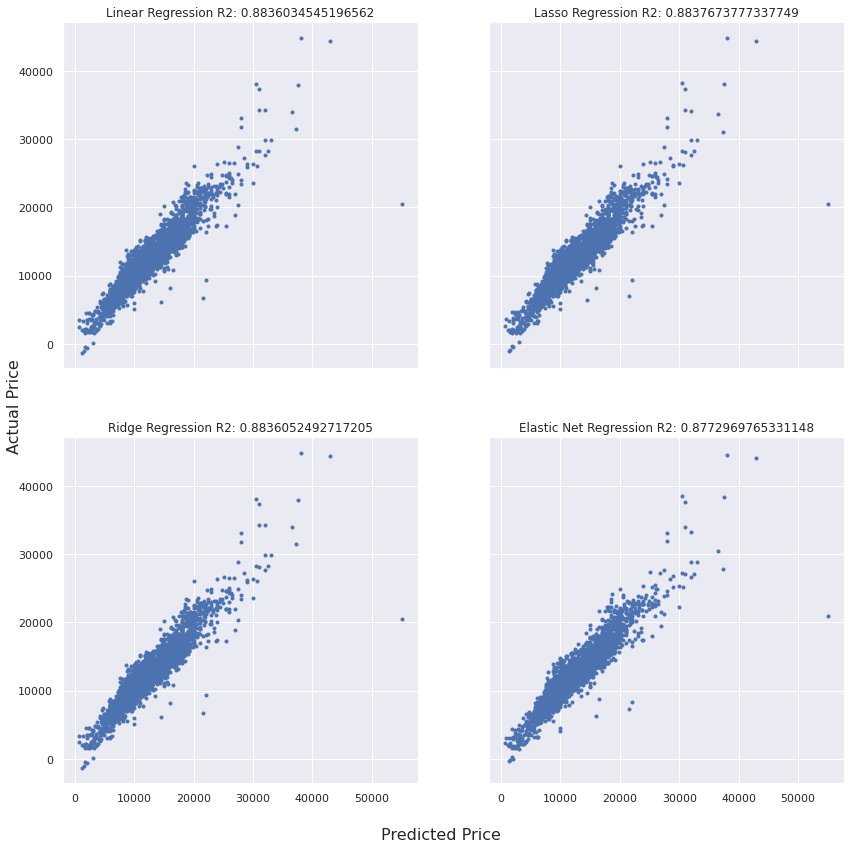

In [57]:
# Make prediction on the test set and plot four scatter plots separately

fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)
fig.text(0.5, 0.07, 'Predicted Price', ha='center', fontdict={'size': 16})
fig.text(0.07, 0.5, 'Actual Price', va='center', rotation='vertical', fontdict={'size': 16})

models = [LinearRegression(), Lasso(alpha=0.3, max_iter=100000),
          Ridge(alpha=0.005, max_iter=100000), ElasticNet(alpha=0.005, max_iter=100000)]

labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for i, ax in enumerate(axes.flatten()):
    y_pred = (XPipe(X_train)
              .model_pipe(models[i], degree=3)
              .fit(X_train, y_train)
              .predict(X_test))

    r_squared = r2_score(y_test, y_pred)

    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
    ax.set(title=f'{labels[i]} Regression R2: {r_squared}')

Lasso Regression has the best prediction on the test set. All these models can explain the target around 87% - 88%.

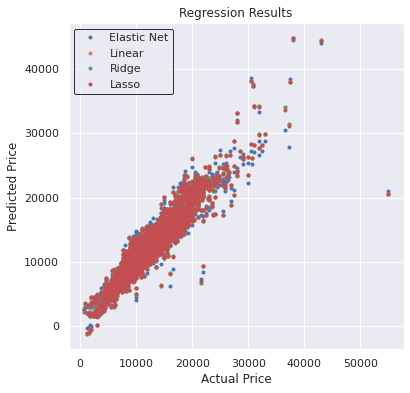

In [58]:
# Make prediction on the test set and plot one combined scatter plot

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

models = [ElasticNet(alpha=0.005, max_iter=100000), LinearRegression(),
          Ridge(alpha=0.005, max_iter=100000), Lasso(alpha=0.3, max_iter=100000)]
         
labels = ['Elastic Net', 'Linear', 'Ridge', 'Lasso']

for mod, lab in zip(models, labels):
    y_pred = (XPipe(X_train)
              .model_pipe(mod, degree=3)
              .fit(X_train, y_train)
              .predict(X_test))
    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Regression Results');

As expected, these plots are nearly identical.

### Feature importance
As shown above, the Lasso Regression is our best model. Let's see which feature is the most important in the model.

In [59]:
# Have a look at the data pipeline
estimator = XPipe(X_train).model_pipe(Lasso(alpha=0.3, max_iter=100000), degree=3)
estimator.fit(X_train, y_train)

Pipeline(steps=[('dataframemapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['model'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7f62958a1100>>)],
                                            {}),
                                           (['transmission'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPi...
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7f62958a1100>>)],
                                            

In [60]:
# Get the transformer list and feature names
transformers = estimator.named_steps['dataframemapper'].features
cat_cols = XPipe(X_train).cat_cols
num_cols = XPipe(X_train).num_cols

In [61]:
# Iterate over each transformer and get the feature names
feature_names = []
for f in transformers:
    for col in cat_cols:
        if f[0] == [col]:
            names = f[1][0].get_feature_names([col]).tolist()
            del names[0]
            feature_names.append(names)
    if f[0] == num_cols:
        names = f[1][2].get_feature_names(num_cols)
        feature_names.append(names)
    else:
        pass
features = [name for names in feature_names for name in names]

In [62]:
beta_coef = estimator.named_steps['lasso'].coef_
print(f'Number of estimates: {len(beta_coef)}')
print(f'Number of features: {len(features)}')

Number of estimates: 82
Number of features: 82


In [63]:
# Print out most importance features by the magnitude of the estimates
df_importances = pd.DataFrame(zip(features, beta_coef), columns=['feature', 'estimate'])
df_importances = df_importances.sort_values(by='estimate', ascending=False).reset_index(drop=True)
print(df_importances.head())
print('-'*50)
print(df_importances.tail())

                feature     estimate
0            model_Edge  8843.717600
1         model_Mustang  6586.165455
2  model_Tourneo Custom  6495.804050
3          model_Galaxy  6244.647057
4           model_S-MAX  5974.849741
--------------------------------------------------
                feature     estimate
77  transmission_Manual  -531.384902
78              mileage -1130.257368
79             model_KA -2084.793385
80                  age -2767.205510
81            model_Ka+ -3703.213652


In [64]:
# If Lasso shrank any coefficient
any(df_importances['estimate'] == 0)

True

In [65]:
# Features that Lasso eliminated
df_importances[df_importances['estimate'] == 0]

,feature,estimate
45,model_Escort,0.0
46,model_Streetka,0.0
47,model_Transit Tourneo,0.0
48,fuelType_Electric,0.0
49,model_Fusion,0.0
50,fuelType_Other,0.0


Looking back at the box plots of price by model and fuel type, we can see that these shrunk features are rare categories in our data set (or their prices do not vary much). I would say Lasso did a good job to eliminate them.

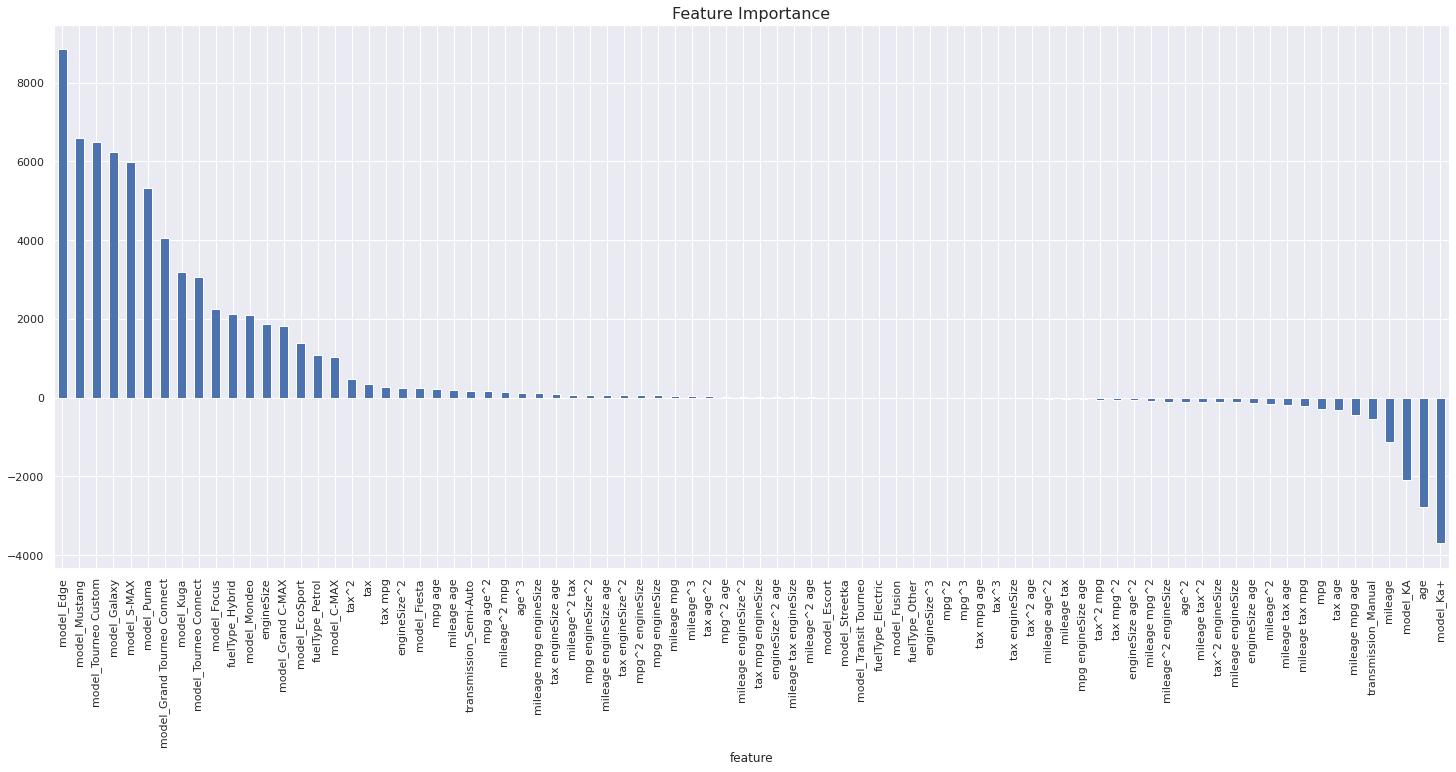

In [66]:
# Visualize the feature importance
df_importances.set_index('feature').plot(kind='bar', legend=None, figsize=(25,10))
plt.title('Feature Importance', fontsize=16);

The main drivers of this model are features that indicate whether or not the car model is Edge, Mustang, Tourneo Custom, Galaxy, S-MAX, Puma, or Grand Tourneo Connect. These are all derived from the categorical feature - model. Among numerical features, age and mileage have the strongest predictive power. Most interaction terms and polynomial features have low estimates in comparison to others.

## 6. Conclusion
This analysis shows that feature engineering can have a large effect on the model performance, and if the data are sufficiently large, cross-validation should be preferred over train-test-split to construct model evaluation. In my case, even though the predictors have high multicollinearity, their coefficients were not shrunk by the Lasso model, and it is shown that regularization does not always make big improvement on a given model. In the end, the Lasso regression has the highest $R^2$ when predicting on the test set, and categories of car model appear to be the most important features to predict a car price. Also, Lasso did shrink some of the features that are not so important in terms of prediction.

While researching further analysis, I found a [suggestion](https://stats.stackexchange.com/a/326846) of using [grouped Lasso](http://cs229.stanford.edu/proj2012/ChoiParkSeo-LassoInCategoricalData.pdf) when a model have categorical features, which is worth trying in this case.